# Data Exploration

In [3]:
import pandas as pd
import numpy as np

In [189]:
# Import the CSV file to df dataframe

df = pd.read_csv("Datasets/IrisDataset/Iris.csv")

In [119]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [126]:
df.shape

(150, 6)

In [12]:
# Find the number of missing values in the df

df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# Separate the numerical and categorical values

categorical = df.columns[df.dtypes == 'object']
numerical = df.columns[df.dtypes != 'object']

In [21]:
df[categorical[0]].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [33]:
for x in numerical:print(x,":",df[x].unique().min(),"-", df[x].unique().max())

Id : 1 - 150
SepalLengthCm : 4.3 - 7.9
SepalWidthCm : 2.0 - 4.4
PetalLengthCm : 1.0 - 6.9
PetalWidthCm : 0.1 - 2.5


In [37]:
mean = df[numerical[1:]].mean()

In [36]:
df[numerical[1:]].median()

SepalLengthCm    5.80
SepalWidthCm     3.00
PetalLengthCm    4.35
PetalWidthCm     1.30
dtype: float64

In [39]:
df[numerical[1:]].std()

SepalLengthCm    0.828066
SepalWidthCm     0.433594
PetalLengthCm    1.764420
PetalWidthCm     0.763161
dtype: float64

# Data Visualization

In [103]:
import matplotlib.pyplot as plt

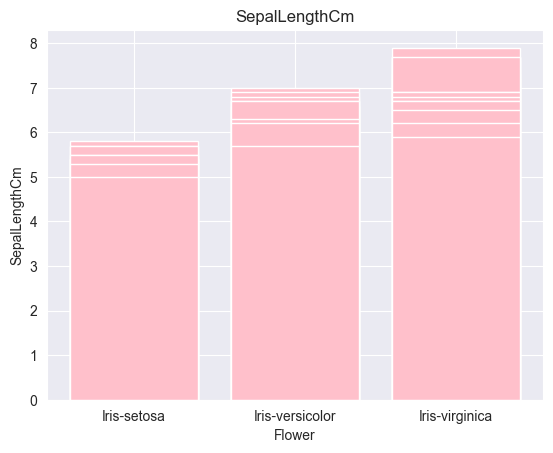

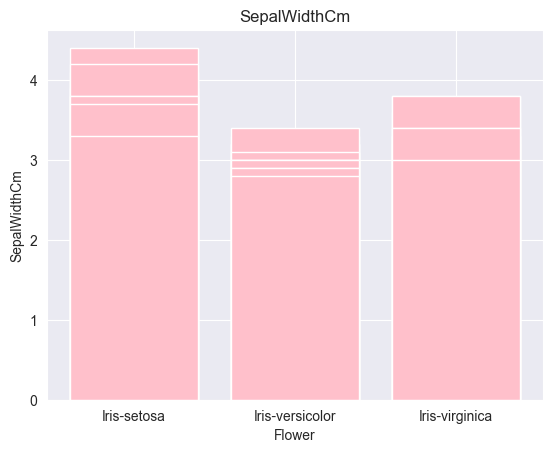

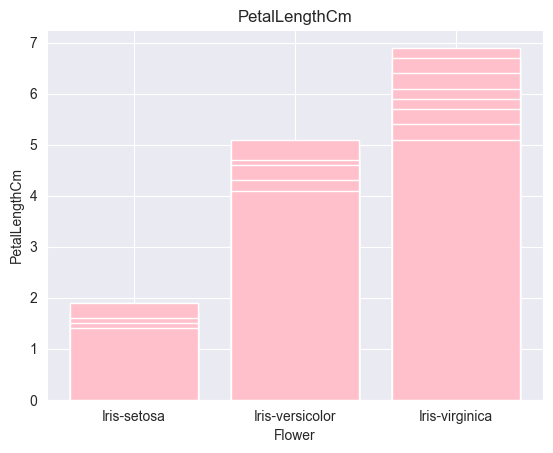

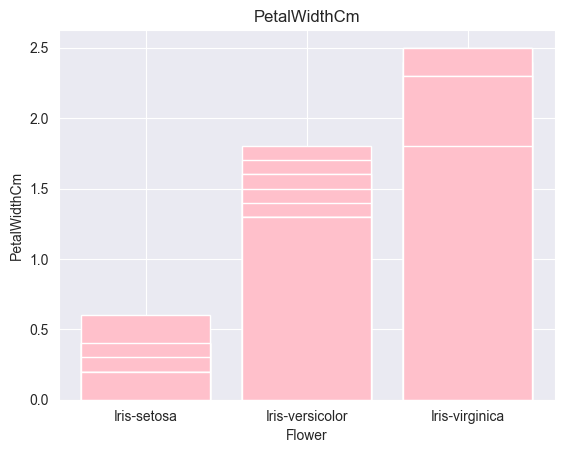

In [173]:
# Bar Graph
sns.set_style("darkgrid")

for i in range(1,len(numerical)): 
    plt.bar(df[categorical[0]],df[numerical[i]], color = "pink")
    plt.title(numerical[i])
    plt.ylabel(numerical[i])
    plt.xlabel("Flower")
    plt.show()

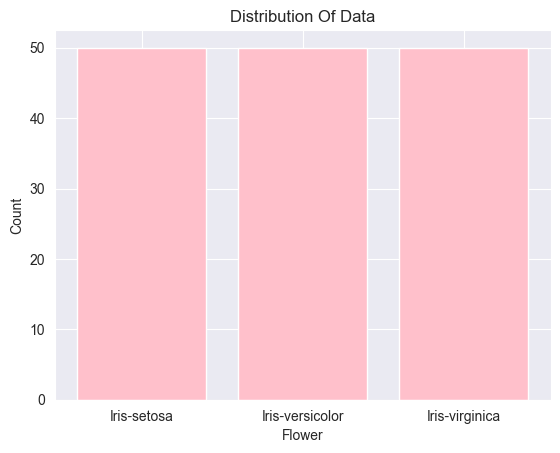

In [172]:
# Bar Graph
sns.set_style("darkgrid")

plt.bar(df[categorical[0]].value_counts().index,df[categorical[0]].value_counts(), color= "pink")
plt.title('Distribution Of Data')
plt.ylabel('Count')
plt.xlabel("Flower")
plt.show()

# By this we can understand that the flowers have an equal distribution.

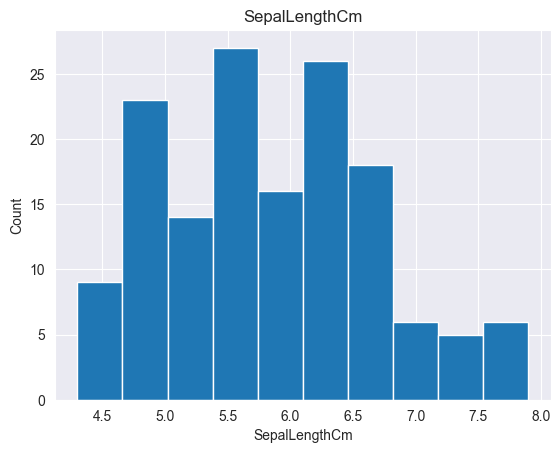

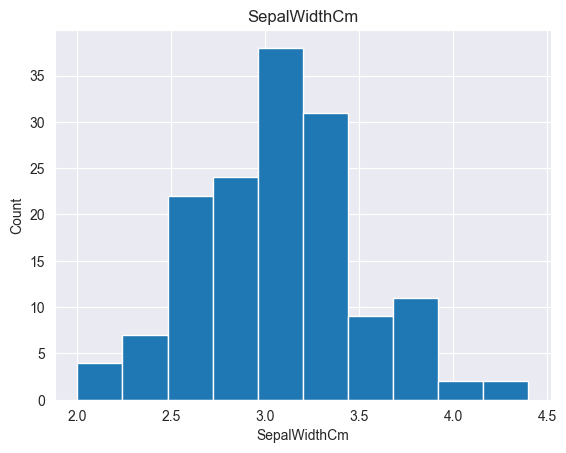

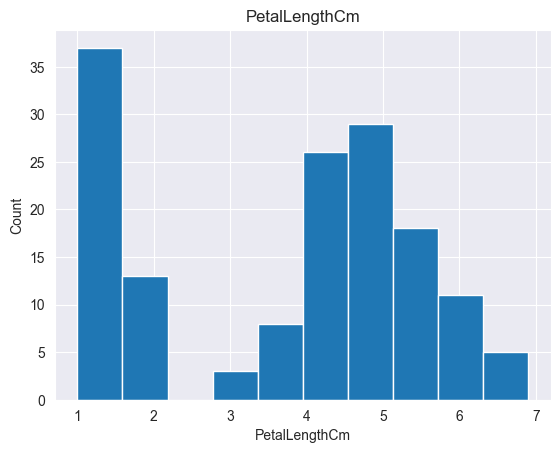

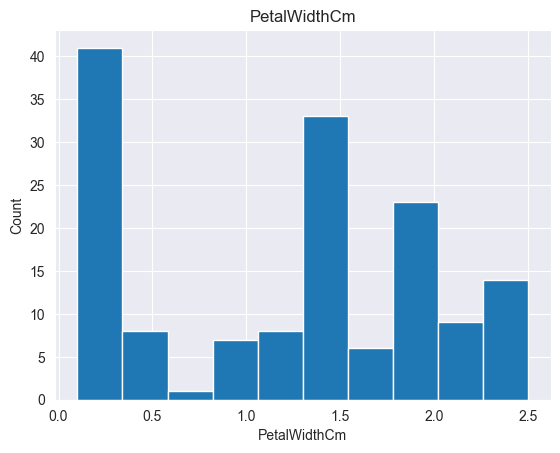

In [171]:
# Histogram
sns.set_style("darkgrid")

for i in range(1,len(numerical)): 
    plt.hist(df[numerical[i]])
    plt.title(numerical[i])
    plt.xlabel(numerical[i])
    plt.ylabel("Count")
    plt.show()

# Exploity data analysis

In [164]:
import seaborn as sns

In [136]:
df[numerical[1:]].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [140]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

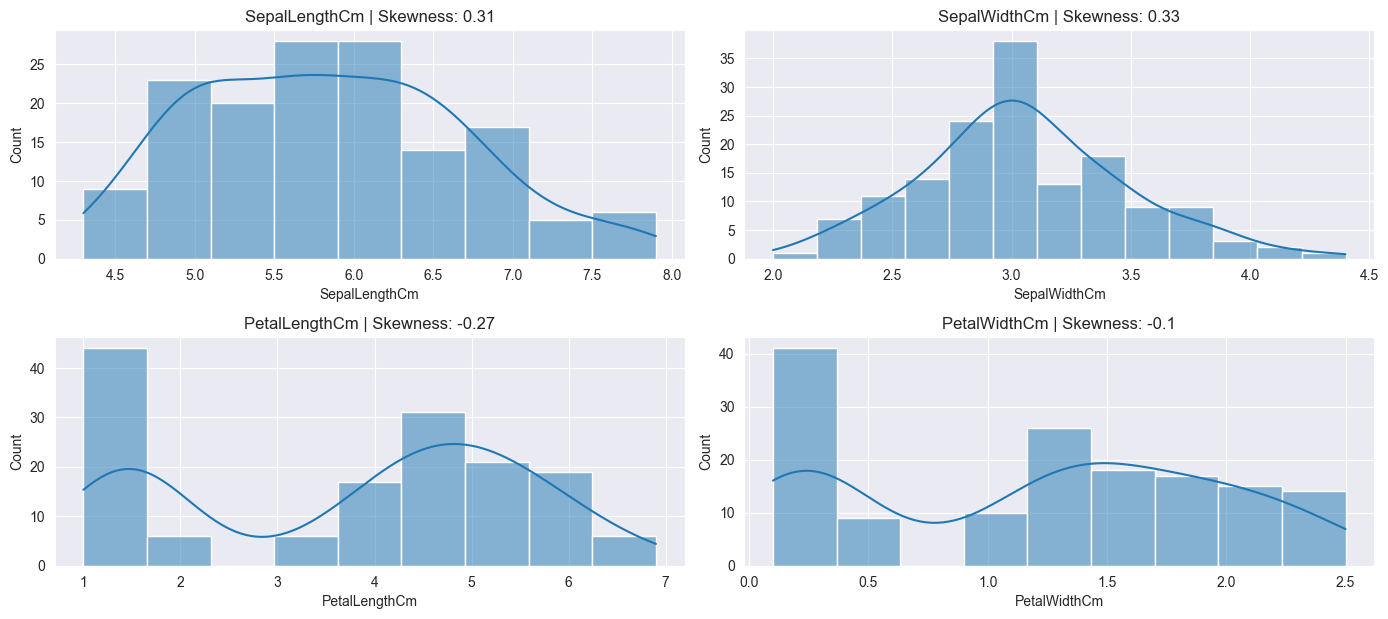

In [168]:
sns.set_style("darkgrid")

plt.figure(figsize =(14, len(numerical[1:])*3))
for idx, feature in enumerate(numerical[1:], 1):
    plt.subplot(len(numerical[1:]), 2, idx)
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

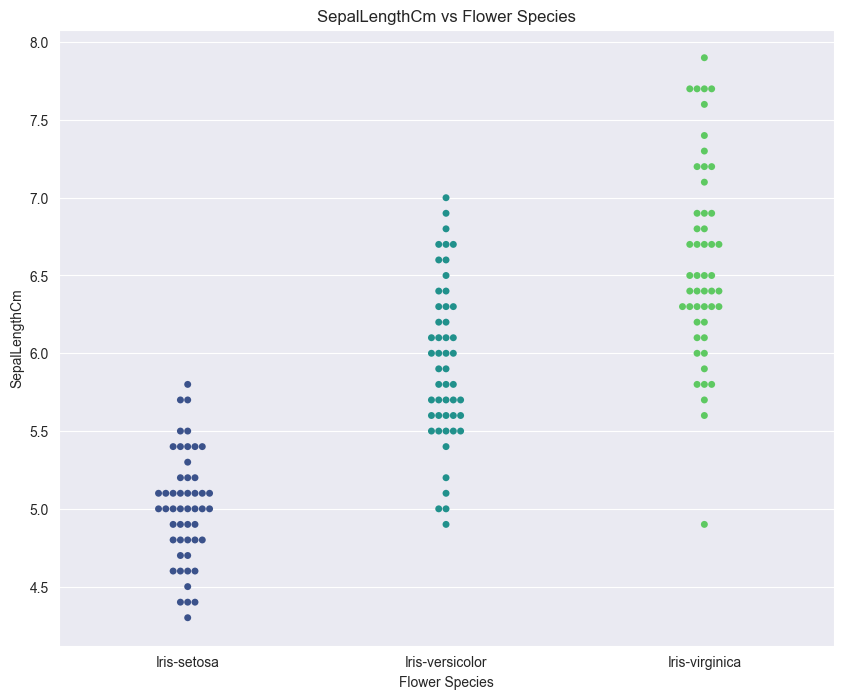

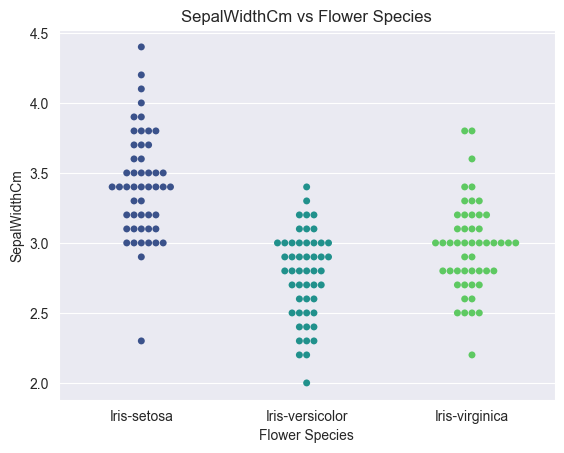

/Users/shivaram/Documents/Python_Projects/Python_Enviornment/env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


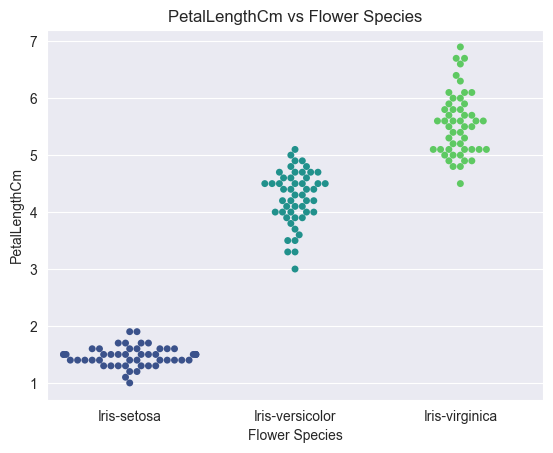

/Users/shivaram/Documents/Python_Projects/Python_Enviornment/env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/shivaram/Documents/Python_Projects/Python_Enviornment/env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 18.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


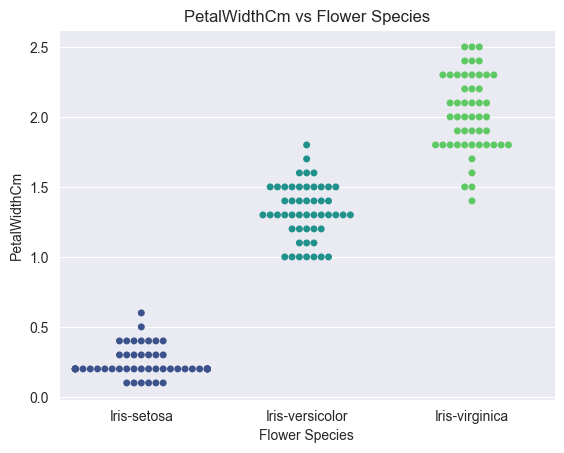

In [178]:
plt.figure(figsize = (10, 8))

for feature in numerical[1:]:
    sns.swarmplot(x = "Species", y = feature, data = df, palette = "viridis", legend = False, hue = "Species")

    plt.title(f"{feature} vs Flower Species")
    plt.xlabel("Flower Species")
    plt.ylabel(feature)
    plt.show()

# Classification Model

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [190]:
X = df[numerical[1:]]
y = df[categorical[0]]

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
onehotencoder = OneHotEncoder();

In [210]:
onehotencoder = onehotencoder.fit_transform(y_train.toarray())

In [193]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [96]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [196]:
y_train = onehotencoder.fit_transform(y_train.reshape(-1,1).toarray())
y_test = onehotencoder.fit_transform(y_train.reshape(-1,1).toarray())

In [197]:
df[categorical[0]].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [198]:
model = LogisticRegression()

In [203]:
model.fit(X_train, np.argmax(y_train.toarray(), axis = 1))

ValueError: Found input variables with inconsistent numbers of samples: [120, 360]

In [204]:
np.argmax(y_train.toarray(), axis = 1)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,